# Neural Networks - Forest Fire Data - Classification

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

import keras
from keras.models import Sequential
from keras.layers import  Dense, Dropout,Activation, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, Adamax

#tensorflow
import tensorflow as tf

### Loading Data

In [2]:

Forestfires= pd.read_csv('forestfires.csv')

In [3]:
# copy the data 
df= Forestfires.copy()

### EDA

In [4]:
# Head of the data
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
df1= df.drop(labels=['month', 'day'], axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
# Checking for null values and datatype of features
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [7]:
features= df1.columns
print(features)

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')


In [8]:
# Since features after area are one hot encoded, we will try to explore the features before that column
features1= features[0:9]
print(features1)

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], dtype='object')


array([[<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>],
       [<AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>]], dtype=object)

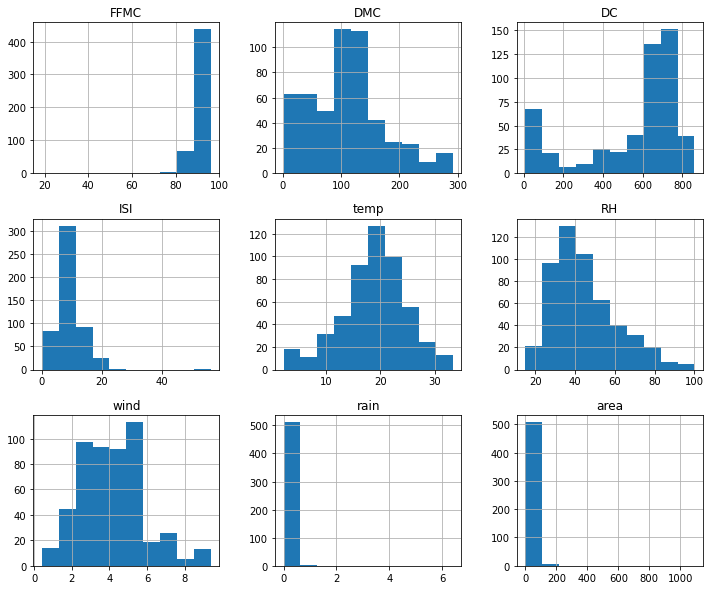

In [9]:
# Distribution of continous features
df1[features1].hist(figsize=(12,10))
plt.show()

In [10]:
for feature in features1:
  unique_values_count= len(df1[feature].unique())
  unique_values= df1[feature].unique()
  print('The {} has {} unique values as {}....'.format(feature, unique_values_count, unique_values[0:5]))

The FFMC has 106 unique values as [86.2 90.6 91.7 89.3 92.3]....
The DMC has 215 unique values as [26.2 35.4 43.7 33.3 51.3]....
The DC has 219 unique values as [ 94.3 669.1 686.9  77.5 102.2]....
The ISI has 119 unique values as [ 5.1  6.7  9.   9.6 14.7]....
The temp has 192 unique values as [ 8.2 18.  14.6  8.3 11.4]....
The RH has 75 unique values as [51 33 97 99 29]....
The wind has 21 unique values as [6.7 0.9 1.3 4.  1.8]....
The rain has 7 unique values as [0.  0.2 1.  6.4 0.8]....
The area has 251 unique values as [0.   0.36 0.43 0.47 0.55]....


From above data, it is clear that the features having the dimensionality issue. Hence we will transform the data

#### Scaling the features

In [11]:
scaler= MinMaxScaler()
df2= pd.DataFrame(scaler.fit_transform(df1[features1]))
df2.head()

,0,1,2,3,4,5,6,7,8
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


In [12]:
df3= df1.iloc[:, 9:]
df3.head()

,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [13]:
final_df= pd.concat([df2,df3], axis=1 )
final_df.head()

,0,1,2,3,4,5,6,7,8,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [14]:
# converting the target feature into numerical one hot coded feature
final_df['size_category']= pd.get_dummies(final_df['size_category'],drop_first=True)

In [15]:
# Final Dataframe
final_df.head()

,0,1,2,3,4,5,6,7,8,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [16]:
final_df.describe()

,0,1,2,3,4,5,6,7,8,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.928318,0.378264,0.633329,0.160814,0.536629,0.344567,0.401956,0.003385,0.011777,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,0.071227,0.220698,0.290918,0.081274,0.186708,0.191970,0.199073,0.046244,0.058355,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922581,0.232598,0.504046,0.115865,0.427653,0.211765,0.255556,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.940645,0.369400,0.769673,0.149733,0.549839,0.317647,0.400000,0.000000,0.000477,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.957419,0.486906,0.827958,0.192513,0.662379,0.447059,0.500000,0.000000,0.006023,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Correlation matrix
c= df1[features1].corr()
print(c)

          FFMC       DMC        DC       ISI      temp        RH      wind  \
FFMC  1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995 -0.028485   
DMC   0.382619  1.000000  0.682192  0.305128  0.469594  0.073795 -0.105342   
DC    0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192 -0.203466   
ISI   0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517  0.106826   
temp  0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390 -0.227116   
RH   -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000  0.069410   
wind -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410  1.000000   
rain  0.056702  0.074790  0.035861  0.067668  0.069491  0.099751  0.061119   
area  0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519  0.012317   

          rain      area  
FFMC  0.056702  0.040122  
DMC   0.074790  0.072994  
DC    0.035861  0.049383  
ISI   0.067668  0.008258  
temp  0.069491  0.097844  
RH    0.099751 -0.075519  
wind  0.061119  0.012317  
rai

<AxesSubplot:>

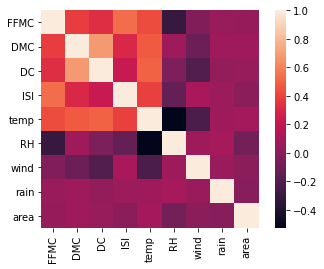

In [18]:
sns.heatmap(c, vmax=1, square=True, annot=True)

### Visualization

<AxesSubplot:xlabel='FFMC', ylabel='size_category'>

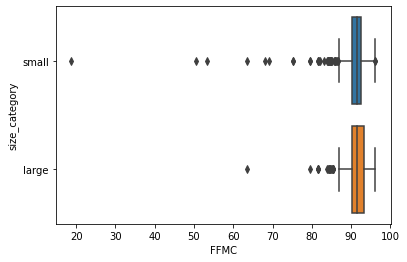

In [19]:
sns.boxplot(data= df1, x= 'FFMC', y= 'size_category')

<AxesSubplot:xlabel='DMC', ylabel='size_category'>

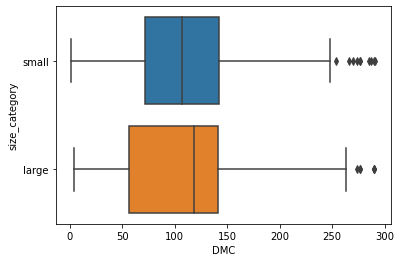

In [20]:
sns.boxplot(data= df1, x= 'DMC', y= 'size_category')

<AxesSubplot:xlabel='DC', ylabel='size_category'>

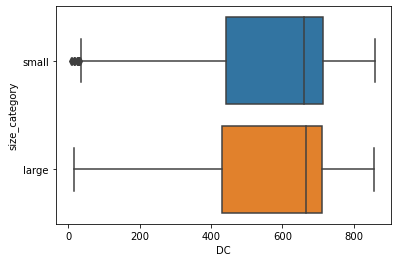

In [21]:
sns.boxplot(data= df1, x= 'DC', y= 'size_category')

<AxesSubplot:xlabel='ISI', ylabel='size_category'>

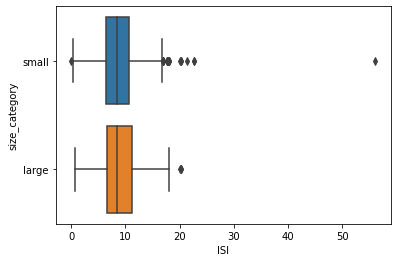

In [22]:
sns.boxplot(data= df1, x= 'ISI', y= 'size_category')

<AxesSubplot:xlabel='temp', ylabel='size_category'>

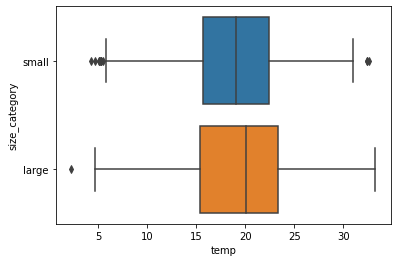

In [23]:
sns.boxplot(data= df1, x= 'temp', y= 'size_category')

<AxesSubplot:xlabel='size_category', ylabel='FFMC'>

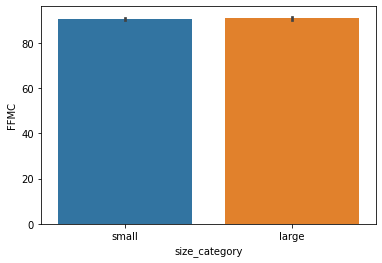

In [24]:
  sns.barplot(data=df1, x='size_category', y='FFMC')

<AxesSubplot:xlabel='size_category', ylabel='DMC'>

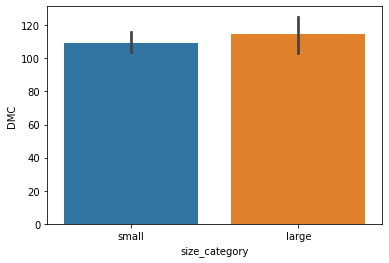

In [25]:
  sns.barplot(data=df1, x='size_category', y='DMC')

<AxesSubplot:xlabel='size_category', ylabel='temp'>

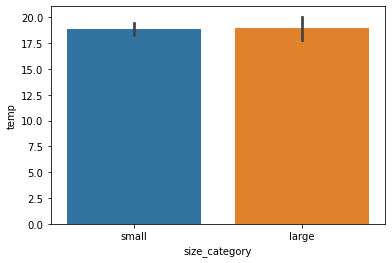

In [26]:
  sns.barplot(data=df1, x='size_category', y='temp')

<AxesSubplot:xlabel='size_category', ylabel='DC'>

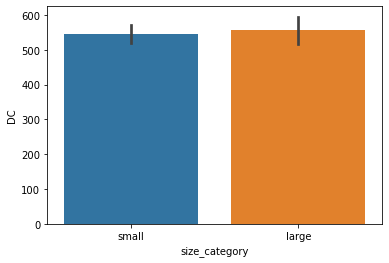

In [27]:
sns.barplot(data=df1, x='size_category', y='DC')

<AxesSubplot:xlabel='size_category', ylabel='ISI'>

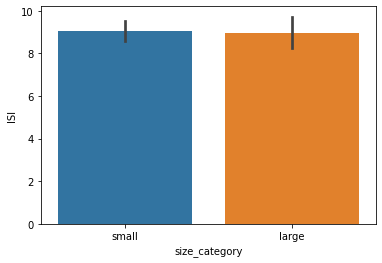

In [28]:
sns.barplot(data=df1, x='size_category', y='ISI')

#### Splitting data into input and target variables

In [29]:
x= final_df.drop(labels=['size_category'], axis=1)
print(x)
y= final_df['size_category']
print(y)

            0         1         2         3         4         5         6  \
0    0.870968  0.086492  0.101325  0.090909  0.192926  0.423529  0.700000   
1    0.927742  0.118194  0.775419  0.119430  0.508039  0.211765  0.055556   
2    0.927742  0.146795  0.796294  0.119430  0.398714  0.211765  0.100000   
3    0.941935  0.110958  0.081623  0.160428  0.196141  0.964706  0.400000   
4    0.910968  0.172984  0.110590  0.171123  0.295820  0.988235  0.155556   
..        ...       ...       ...       ...       ...       ...       ...   
512  0.811613  0.191592  0.771315  0.033868  0.823151  0.200000  0.255556   
513  0.811613  0.191592  0.771315  0.033868  0.633441  0.658824  0.600000   
514  0.811613  0.191592  0.771315  0.033868  0.610932  0.647059  0.700000   
515  0.976774  0.499311  0.711622  0.201426  0.752412  0.317647  0.400000   
516  0.784516  0.006547  0.115867  0.019608  0.308682  0.188235  0.455556   

           7         8  dayfri  ...  monthdec  monthfeb  monthjan  monthjul

#### Tuning Hyperparameters: Batch Size and epochs

In [30]:
# Create sequential model:
def base_model():
  model= Sequential()
  model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  # output layer
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
  # optimizer 
  adam= Adam()
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model, verbose= 0)
# Define GridSearch Model
batch_size= [10, 20, 40, 100]
epochs= [10, 20, 50, 100]
# make a Dictionary to store grid parameters
grid_param= dict(batch_size=batch_size, epochs=epochs )
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10 )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END .................batch_size=10, epochs=10; total time=  11.3s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END .................batch_size=10, epochs=10; total time=   1.0s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END .................batch_size=10, epochs=10; total time=   1.1s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END .................batch_size=10, epochs=10; total time=   1.0s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END .................batch_size=10, epochs=10; total time=   1.2s
[CV 1/5; 2/16] START batch_size=10, epochs=20...................................
[CV 1/5; 2/16] END .................batch_size=1

[CV 5/5; 9/16] END .................batch_size=40, epochs=10; total time=   1.1s
[CV 1/5; 10/16] START batch_size=40, epochs=20..................................
[CV 1/5; 10/16] END ................batch_size=40, epochs=20; total time=   1.0s
[CV 2/5; 10/16] START batch_size=40, epochs=20..................................
[CV 2/5; 10/16] END ................batch_size=40, epochs=20; total time=   0.9s
[CV 3/5; 10/16] START batch_size=40, epochs=20..................................
[CV 3/5; 10/16] END ................batch_size=40, epochs=20; total time=   0.9s
[CV 4/5; 10/16] START batch_size=40, epochs=20..................................
[CV 4/5; 10/16] END ................batch_size=40, epochs=20; total time=   1.1s
[CV 5/5; 10/16] START batch_size=40, epochs=20..................................
[CV 5/5; 10/16] END ................batch_size=40, epochs=20; total time=   0.9s
[CV 1/5; 11/16] START batch_size=40, epochs=50..................................
[CV 1/5; 11/16] END ........

In [31]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.8025205492973327, using {'batch_size': 10, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 20}
0.722908878326416,0.13763253318069418 with: {'batch_size': 10, 'epochs': 50}
0.8025205492973327,0.10145466559894424 with: {'batch_size': 10, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 20}
0.7171396493911744,0.1281927438290375 with: {'batch_size': 20, 'epochs': 50}
0.7404032826423645,0.13408234201644542 with: {'batch_size': 20, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 20}
0.728659451007843,0.1510055827692834 with: {'batch_size': 40, 'epochs': 50}
0.7248879790306091,0.1302077173266761 with: {'batch_size': 40, 'epochs': 100}
0

#### Tuning hyperparameter: Learning rate and dropout rate

In [32]:
# Create sequential model:
def base_model_lr_drate(learning_rate,dropout_rate):
  model= Sequential()
  model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(dropout_rate))
  # output layer
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=learning_rate)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_lr_drate, verbose= 0, batch_size=10, epochs=100)
# Define GridSearch Model
learning_rate= [0.001, 0.01, 0.10, 0.2, 0.5]
dropout_rate= [0, 0.1, 0.2, 0.5]
# make a Dictionary to store grid parameters
grid_param= dict(learning_rate=learning_rate, dropout_rate=dropout_rate )
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10, return_train_score=True )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START dropout_rate=0, learning_rate=0.001........................
[CV 1/5; 1/20] END ......dropout_rate=0, learning_rate=0.001; total time=   3.9s
[CV 2/5; 1/20] START dropout_rate=0, learning_rate=0.001........................
[CV 2/5; 1/20] END ......dropout_rate=0, learning_rate=0.001; total time=   2.8s
[CV 3/5; 1/20] START dropout_rate=0, learning_rate=0.001........................
[CV 3/5; 1/20] END ......dropout_rate=0, learning_rate=0.001; total time=   2.8s
[CV 4/5; 1/20] START dropout_rate=0, learning_rate=0.001........................
[CV 4/5; 1/20] END ......dropout_rate=0, learning_rate=0.001; total time=   2.9s
[CV 5/5; 1/20] START dropout_rate=0, learning_rate=0.001........................
[CV 5/5; 1/20] END ......dropout_rate=0, learning_rate=0.001; total time=   3.4s
[CV 1/5; 2/20] START dropout_rate=0, learning_rate=0.01.........................
[CV 1/5; 2/20] END .......dropout_rate=0, learn

[CV 1/5; 11/20] END ...dropout_rate=0.2, learning_rate=0.001; total time=   2.9s
[CV 2/5; 11/20] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 2/5; 11/20] END ...dropout_rate=0.2, learning_rate=0.001; total time=   3.2s
[CV 3/5; 11/20] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 3/5; 11/20] END ...dropout_rate=0.2, learning_rate=0.001; total time=   3.9s
[CV 4/5; 11/20] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 4/5; 11/20] END ...dropout_rate=0.2, learning_rate=0.001; total time=   3.7s
[CV 5/5; 11/20] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 5/5; 11/20] END ...dropout_rate=0.2, learning_rate=0.001; total time=   2.9s
[CV 1/5; 12/20] START dropout_rate=0.2, learning_rate=0.01......................
[CV 1/5; 12/20] END ....dropout_rate=0.2, learning_rate=0.01; total time=   3.1s
[CV 2/5; 12/20] START dropout_rate=0.2, learning_rate=0.01......................
[CV 2/5; 12/20] END ....drop

In [33]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.8877147078514099, using {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7946601986885071,0.13071056093594002 with: {'dropout_rate': 0, 'learning_rate': 0.001}
0.8781366586685181,0.0289608010193111 with: {'dropout_rate': 0, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0, 'learning_rate': 0.2}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0, 'learning_rate': 0.5}
0.7558252453804016,0.14094855458319858 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.8877147078514099,0.06396114892334781 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.2}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.5}
0.7441747546195984,0.15396540272278342 

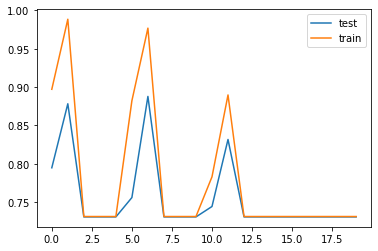

In [34]:
# plotting train test plot
test_scores= grid_results.cv_results_['mean_test_score']
train_scores=grid_results.cv_results_['mean_train_score']

plt.plot(test_scores, label='test')
plt.plot(train_scores, label= 'train')
plt.legend(loc='best')
plt.show()

#### Tuning hyperparameter: Activation function and Kernal initializer

In [35]:
# Create sequential model:
def base_model_af_init(init,activation_function):
  model= Sequential()
  model.add(Dense(12, input_dim=28, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(0.1))
  model.add(Dense(8, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(0.1))
  model.add(Dense(8, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(0.1))
  # output layer
  model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=0.01)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_af_init, verbose= 0, batch_size=10, epochs=100)
# Define GridSearch Model
init= ['uniform', 'normal', 'zero']
activation_function= ['relu', 'sigmoid', 'tanh', 'linear', 'softmax']
# make a Dictionary to store grid parameters
grid_param= dict(init=init, activation_function=activation_function )
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10, return_train_score=True )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START activation_function=relu, init=uniform.....................
[CV 1/5; 1/15] END ...activation_function=relu, init=uniform; total time=   3.0s
[CV 2/5; 1/15] START activation_function=relu, init=uniform.....................
[CV 2/5; 1/15] END ...activation_function=relu, init=uniform; total time=   3.3s
[CV 3/5; 1/15] START activation_function=relu, init=uniform.....................
[CV 3/5; 1/15] END ...activation_function=relu, init=uniform; total time=   3.9s
[CV 4/5; 1/15] START activation_function=relu, init=uniform.....................
[CV 4/5; 1/15] END ...activation_function=relu, init=uniform; total time=   3.1s
[CV 5/5; 1/15] START activation_function=relu, init=uniform.....................
[CV 5/5; 1/15] END ...activation_function=relu, init=uniform; total time=   3.1s
[CV 1/5; 2/15] START activation_function=relu, init=normal......................
[CV 1/5; 2/15] END ....activation_function=relu,

[CV 1/5; 11/15] END .activation_function=linear, init=normal; total time=   2.9s
[CV 2/5; 11/15] START activation_function=linear, init=normal...................
[CV 2/5; 11/15] END .activation_function=linear, init=normal; total time=   2.9s
[CV 3/5; 11/15] START activation_function=linear, init=normal...................
[CV 3/5; 11/15] END .activation_function=linear, init=normal; total time=   3.0s
[CV 4/5; 11/15] START activation_function=linear, init=normal...................
[CV 4/5; 11/15] END .activation_function=linear, init=normal; total time=   3.9s
[CV 5/5; 11/15] START activation_function=linear, init=normal...................
[CV 5/5; 11/15] END .activation_function=linear, init=normal; total time=   3.2s
[CV 1/5; 12/15] START activation_function=linear, init=zero.....................
[CV 1/5; 12/15] END ...activation_function=linear, init=zero; total time=   2.9s
[CV 2/5; 12/15] START activation_function=linear, init=zero.....................
[CV 2/5; 12/15] END ...activ

In [36]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.9651045560836792, using {'activation_function': 'linear', 'init': 'normal'}
0.891579532623291,0.06905162295437398 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8741598129272461,0.03441345529717798 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.8547610282897949,0.07664487388983812 with: {'activation_function': 'sigmoid', 'init': 'uniform'}
0.8393390655517579,0.07652183072809318 with: {'activation_function': 'sigmoid', 'init': 'normal'}
0.8567401170730591,0.07470737190934956 with: {'activation_function': 'sigmoid', 'init': 'zero'}
0.9127894043922424,0.07081470937090642 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9147684931755066,0.039491145687009614 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9495705842971802,0.03158775458129654 with: {'activatio

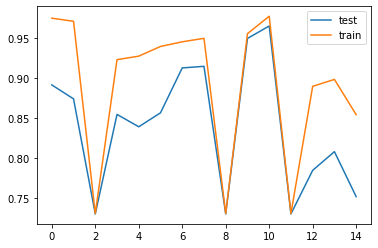

In [37]:
# plotting train test plot
test_scores= grid_results.cv_results_['mean_test_score']
train_scores=grid_results.cv_results_['mean_train_score']

plt.plot(test_scores, label='test')
plt.plot(train_scores, label= 'train')
plt.legend(loc='best')
plt.show()

#### Tuning hyperparameter: Number of neurons in activatino layer

In [38]:
# Create sequential model:
def base_model_num_neuron(neuron1,neuron2, neuron3):
  model= Sequential()
  model.add(Dense(neuron1, input_dim=28, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(neuron2, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(neuron3, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  # output layer
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=0.01)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_num_neuron, verbose= 0, batch_size=10, epochs=100)
# Define GridSearch Model
neuron1= [2,8,16,25,30]
neuron2= [2,8,16,25,30]
neuron3= [2,8,16,25,30]
# make a Dictionary to store grid parameters
grid_param= dict(neuron1=neuron1, neuron2=neuron2, neuron3=neuron3)
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10, return_train_score=True )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5; 1/125] START neuron1=2, neuron2=2, neuron3=2...........................
[CV 1/5; 1/125] END .........neuron1=2, neuron2=2, neuron3=2; total time=   3.5s
[CV 2/5; 1/125] START neuron1=2, neuron2=2, neuron3=2...........................
[CV 2/5; 1/125] END .........neuron1=2, neuron2=2, neuron3=2; total time=   2.8s
[CV 3/5; 1/125] START neuron1=2, neuron2=2, neuron3=2...........................
[CV 3/5; 1/125] END .........neuron1=2, neuron2=2, neuron3=2; total time=   3.1s
[CV 4/5; 1/125] START neuron1=2, neuron2=2, neuron3=2...........................
[CV 4/5; 1/125] END .........neuron1=2, neuron2=2, neuron3=2; total time=   2.8s
[CV 5/5; 1/125] START neuron1=2, neuron2=2, neuron3=2...........................
[CV 5/5; 1/125] END .........neuron1=2, neuron2=2, neuron3=2; total time=   3.3s
[CV 1/5; 2/125] START neuron1=2, neuron2=2, neuron3=8...........................
[CV 1/5; 2/125] END .........neuron1=2, neuron

[CV 1/5; 11/125] END .......neuron1=2, neuron2=16, neuron3=2; total time=   2.9s
[CV 2/5; 11/125] START neuron1=2, neuron2=16, neuron3=2.........................
[CV 2/5; 11/125] END .......neuron1=2, neuron2=16, neuron3=2; total time=   3.0s
[CV 3/5; 11/125] START neuron1=2, neuron2=16, neuron3=2.........................
[CV 3/5; 11/125] END .......neuron1=2, neuron2=16, neuron3=2; total time=   2.9s
[CV 4/5; 11/125] START neuron1=2, neuron2=16, neuron3=2.........................
[CV 4/5; 11/125] END .......neuron1=2, neuron2=16, neuron3=2; total time=   3.6s
[CV 5/5; 11/125] START neuron1=2, neuron2=16, neuron3=2.........................
[CV 5/5; 11/125] END .......neuron1=2, neuron2=16, neuron3=2; total time=   3.3s
[CV 1/5; 12/125] START neuron1=2, neuron2=16, neuron3=8.........................
[CV 1/5; 12/125] END .......neuron1=2, neuron2=16, neuron3=8; total time=   3.0s
[CV 2/5; 12/125] START neuron1=2, neuron2=16, neuron3=8.........................
[CV 2/5; 12/125] END .......

[CV 2/5; 21/125] END .......neuron1=2, neuron2=30, neuron3=2; total time=   3.4s
[CV 3/5; 21/125] START neuron1=2, neuron2=30, neuron3=2.........................
[CV 3/5; 21/125] END .......neuron1=2, neuron2=30, neuron3=2; total time=   3.4s
[CV 4/5; 21/125] START neuron1=2, neuron2=30, neuron3=2.........................
[CV 4/5; 21/125] END .......neuron1=2, neuron2=30, neuron3=2; total time=   3.1s
[CV 5/5; 21/125] START neuron1=2, neuron2=30, neuron3=2.........................
[CV 5/5; 21/125] END .......neuron1=2, neuron2=30, neuron3=2; total time=   2.8s
[CV 1/5; 22/125] START neuron1=2, neuron2=30, neuron3=8.........................
[CV 1/5; 22/125] END .......neuron1=2, neuron2=30, neuron3=8; total time=   2.9s
[CV 2/5; 22/125] START neuron1=2, neuron2=30, neuron3=8.........................
[CV 2/5; 22/125] END .......neuron1=2, neuron2=30, neuron3=8; total time=   3.9s
[CV 3/5; 22/125] START neuron1=2, neuron2=30, neuron3=8.........................
[CV 3/5; 22/125] END .......

[CV 3/5; 31/125] END ........neuron1=8, neuron2=8, neuron3=2; total time=   2.8s
[CV 4/5; 31/125] START neuron1=8, neuron2=8, neuron3=2..........................
[CV 4/5; 31/125] END ........neuron1=8, neuron2=8, neuron3=2; total time=   2.9s
[CV 5/5; 31/125] START neuron1=8, neuron2=8, neuron3=2..........................
[CV 5/5; 31/125] END ........neuron1=8, neuron2=8, neuron3=2; total time=   3.6s
[CV 1/5; 32/125] START neuron1=8, neuron2=8, neuron3=8..........................
[CV 1/5; 32/125] END ........neuron1=8, neuron2=8, neuron3=8; total time=   3.1s
[CV 2/5; 32/125] START neuron1=8, neuron2=8, neuron3=8..........................
[CV 2/5; 32/125] END ........neuron1=8, neuron2=8, neuron3=8; total time=   2.8s
[CV 3/5; 32/125] START neuron1=8, neuron2=8, neuron3=8..........................
[CV 3/5; 32/125] END ........neuron1=8, neuron2=8, neuron3=8; total time=   2.8s
[CV 4/5; 32/125] START neuron1=8, neuron2=8, neuron3=8..........................
[CV 4/5; 32/125] END .......

[CV 4/5; 41/125] END .......neuron1=8, neuron2=25, neuron3=2; total time=   3.4s
[CV 5/5; 41/125] START neuron1=8, neuron2=25, neuron3=2.........................
[CV 5/5; 41/125] END .......neuron1=8, neuron2=25, neuron3=2; total time=   2.8s
[CV 1/5; 42/125] START neuron1=8, neuron2=25, neuron3=8.........................
[CV 1/5; 42/125] END .......neuron1=8, neuron2=25, neuron3=8; total time=   3.0s
[CV 2/5; 42/125] START neuron1=8, neuron2=25, neuron3=8.........................
[CV 2/5; 42/125] END .......neuron1=8, neuron2=25, neuron3=8; total time=   2.9s
[CV 3/5; 42/125] START neuron1=8, neuron2=25, neuron3=8.........................
[CV 3/5; 42/125] END .......neuron1=8, neuron2=25, neuron3=8; total time=   3.4s
[CV 4/5; 42/125] START neuron1=8, neuron2=25, neuron3=8.........................
[CV 4/5; 42/125] END .......neuron1=8, neuron2=25, neuron3=8; total time=   3.4s
[CV 5/5; 42/125] START neuron1=8, neuron2=25, neuron3=8.........................
[CV 5/5; 42/125] END .......

[CV 5/5; 51/125] END .......neuron1=16, neuron2=2, neuron3=2; total time=   4.0s
[CV 1/5; 52/125] START neuron1=16, neuron2=2, neuron3=8.........................
[CV 1/5; 52/125] END .......neuron1=16, neuron2=2, neuron3=8; total time=   4.4s
[CV 2/5; 52/125] START neuron1=16, neuron2=2, neuron3=8.........................
[CV 2/5; 52/125] END .......neuron1=16, neuron2=2, neuron3=8; total time=   3.0s
[CV 3/5; 52/125] START neuron1=16, neuron2=2, neuron3=8.........................
[CV 3/5; 52/125] END .......neuron1=16, neuron2=2, neuron3=8; total time=   3.4s
[CV 4/5; 52/125] START neuron1=16, neuron2=2, neuron3=8.........................
[CV 4/5; 52/125] END .......neuron1=16, neuron2=2, neuron3=8; total time=   4.0s
[CV 5/5; 52/125] START neuron1=16, neuron2=2, neuron3=8.........................
[CV 5/5; 52/125] END .......neuron1=16, neuron2=2, neuron3=8; total time=   3.8s
[CV 1/5; 53/125] START neuron1=16, neuron2=2, neuron3=16........................
[CV 1/5; 53/125] END ......n

[CV 1/5; 62/125] END ......neuron1=16, neuron2=16, neuron3=8; total time=   3.1s
[CV 2/5; 62/125] START neuron1=16, neuron2=16, neuron3=8........................
[CV 2/5; 62/125] END ......neuron1=16, neuron2=16, neuron3=8; total time=   2.9s
[CV 3/5; 62/125] START neuron1=16, neuron2=16, neuron3=8........................
[CV 3/5; 62/125] END ......neuron1=16, neuron2=16, neuron3=8; total time=   3.5s
[CV 4/5; 62/125] START neuron1=16, neuron2=16, neuron3=8........................
[CV 4/5; 62/125] END ......neuron1=16, neuron2=16, neuron3=8; total time=   3.8s
[CV 5/5; 62/125] START neuron1=16, neuron2=16, neuron3=8........................
[CV 5/5; 62/125] END ......neuron1=16, neuron2=16, neuron3=8; total time=   2.9s
[CV 1/5; 63/125] START neuron1=16, neuron2=16, neuron3=16.......................
[CV 1/5; 63/125] END .....neuron1=16, neuron2=16, neuron3=16; total time=   2.9s
[CV 2/5; 63/125] START neuron1=16, neuron2=16, neuron3=16.......................
[CV 2/5; 63/125] END .....ne

[CV 2/5; 72/125] END ......neuron1=16, neuron2=30, neuron3=8; total time=   3.8s
[CV 3/5; 72/125] START neuron1=16, neuron2=30, neuron3=8........................
[CV 3/5; 72/125] END ......neuron1=16, neuron2=30, neuron3=8; total time=   4.0s
[CV 4/5; 72/125] START neuron1=16, neuron2=30, neuron3=8........................
[CV 4/5; 72/125] END ......neuron1=16, neuron2=30, neuron3=8; total time=   3.0s
[CV 5/5; 72/125] START neuron1=16, neuron2=30, neuron3=8........................
[CV 5/5; 72/125] END ......neuron1=16, neuron2=30, neuron3=8; total time=   3.1s
[CV 1/5; 73/125] START neuron1=16, neuron2=30, neuron3=16.......................
[CV 1/5; 73/125] END .....neuron1=16, neuron2=30, neuron3=16; total time=   3.6s
[CV 2/5; 73/125] START neuron1=16, neuron2=30, neuron3=16.......................
[CV 2/5; 73/125] END .....neuron1=16, neuron2=30, neuron3=16; total time=   4.1s
[CV 3/5; 73/125] START neuron1=16, neuron2=30, neuron3=16.......................
[CV 3/5; 73/125] END .....ne

[CV 3/5; 82/125] END .......neuron1=25, neuron2=8, neuron3=8; total time=   3.9s
[CV 4/5; 82/125] START neuron1=25, neuron2=8, neuron3=8.........................
[CV 4/5; 82/125] END .......neuron1=25, neuron2=8, neuron3=8; total time=   4.3s
[CV 5/5; 82/125] START neuron1=25, neuron2=8, neuron3=8.........................
[CV 5/5; 82/125] END .......neuron1=25, neuron2=8, neuron3=8; total time=   3.6s
[CV 1/5; 83/125] START neuron1=25, neuron2=8, neuron3=16........................
[CV 1/5; 83/125] END ......neuron1=25, neuron2=8, neuron3=16; total time=   3.8s
[CV 2/5; 83/125] START neuron1=25, neuron2=8, neuron3=16........................
[CV 2/5; 83/125] END ......neuron1=25, neuron2=8, neuron3=16; total time=   3.8s
[CV 3/5; 83/125] START neuron1=25, neuron2=8, neuron3=16........................
[CV 3/5; 83/125] END ......neuron1=25, neuron2=8, neuron3=16; total time=   5.9s
[CV 4/5; 83/125] START neuron1=25, neuron2=8, neuron3=16........................
[CV 4/5; 83/125] END ......n

[CV 4/5; 92/125] END ......neuron1=25, neuron2=25, neuron3=8; total time=   3.8s
[CV 5/5; 92/125] START neuron1=25, neuron2=25, neuron3=8........................
[CV 5/5; 92/125] END ......neuron1=25, neuron2=25, neuron3=8; total time=   4.0s
[CV 1/5; 93/125] START neuron1=25, neuron2=25, neuron3=16.......................
[CV 1/5; 93/125] END .....neuron1=25, neuron2=25, neuron3=16; total time=   3.2s
[CV 2/5; 93/125] START neuron1=25, neuron2=25, neuron3=16.......................
[CV 2/5; 93/125] END .....neuron1=25, neuron2=25, neuron3=16; total time=   3.3s
[CV 3/5; 93/125] START neuron1=25, neuron2=25, neuron3=16.......................
[CV 3/5; 93/125] END .....neuron1=25, neuron2=25, neuron3=16; total time=   3.7s
[CV 4/5; 93/125] START neuron1=25, neuron2=25, neuron3=16.......................
[CV 4/5; 93/125] END .....neuron1=25, neuron2=25, neuron3=16; total time=   4.2s
[CV 5/5; 93/125] START neuron1=25, neuron2=25, neuron3=16.......................
[CV 5/5; 93/125] END .....ne

[CV 5/5; 102/125] END ......neuron1=30, neuron2=2, neuron3=8; total time=   4.6s
[CV 1/5; 103/125] START neuron1=30, neuron2=2, neuron3=16.......................
[CV 1/5; 103/125] END .....neuron1=30, neuron2=2, neuron3=16; total time=   3.0s
[CV 2/5; 103/125] START neuron1=30, neuron2=2, neuron3=16.......................
[CV 2/5; 103/125] END .....neuron1=30, neuron2=2, neuron3=16; total time=   3.3s
[CV 3/5; 103/125] START neuron1=30, neuron2=2, neuron3=16.......................
[CV 3/5; 103/125] END .....neuron1=30, neuron2=2, neuron3=16; total time=   4.2s
[CV 4/5; 103/125] START neuron1=30, neuron2=2, neuron3=16.......................
[CV 4/5; 103/125] END .....neuron1=30, neuron2=2, neuron3=16; total time=   6.0s
[CV 5/5; 103/125] START neuron1=30, neuron2=2, neuron3=16.......................
[CV 5/5; 103/125] END .....neuron1=30, neuron2=2, neuron3=16; total time=   4.9s
[CV 1/5; 104/125] START neuron1=30, neuron2=2, neuron3=25.......................
[CV 1/5; 104/125] END .....n

[CV 1/5; 113/125] END ....neuron1=30, neuron2=16, neuron3=16; total time=   3.1s
[CV 2/5; 113/125] START neuron1=30, neuron2=16, neuron3=16......................
[CV 2/5; 113/125] END ....neuron1=30, neuron2=16, neuron3=16; total time=   3.5s
[CV 3/5; 113/125] START neuron1=30, neuron2=16, neuron3=16......................
[CV 3/5; 113/125] END ....neuron1=30, neuron2=16, neuron3=16; total time=   4.6s
[CV 4/5; 113/125] START neuron1=30, neuron2=16, neuron3=16......................
[CV 4/5; 113/125] END ....neuron1=30, neuron2=16, neuron3=16; total time=   3.7s
[CV 5/5; 113/125] START neuron1=30, neuron2=16, neuron3=16......................
[CV 5/5; 113/125] END ....neuron1=30, neuron2=16, neuron3=16; total time=   3.2s
[CV 1/5; 114/125] START neuron1=30, neuron2=16, neuron3=25......................
[CV 1/5; 114/125] END ....neuron1=30, neuron2=16, neuron3=25; total time=   3.4s
[CV 2/5; 114/125] START neuron1=30, neuron2=16, neuron3=25......................
[CV 2/5; 114/125] END ....ne

[CV 2/5; 123/125] END ....neuron1=30, neuron2=30, neuron3=16; total time=   3.1s
[CV 3/5; 123/125] START neuron1=30, neuron2=30, neuron3=16......................
[CV 3/5; 123/125] END ....neuron1=30, neuron2=30, neuron3=16; total time=   3.8s
[CV 4/5; 123/125] START neuron1=30, neuron2=30, neuron3=16......................
[CV 4/5; 123/125] END ....neuron1=30, neuron2=30, neuron3=16; total time=   4.3s
[CV 5/5; 123/125] START neuron1=30, neuron2=30, neuron3=16......................
[CV 5/5; 123/125] END ....neuron1=30, neuron2=30, neuron3=16; total time=   3.2s
[CV 1/5; 124/125] START neuron1=30, neuron2=30, neuron3=25......................
[CV 1/5; 124/125] END ....neuron1=30, neuron2=30, neuron3=25; total time=   3.2s
[CV 2/5; 124/125] START neuron1=30, neuron2=30, neuron3=25......................
[CV 2/5; 124/125] END ....neuron1=30, neuron2=30, neuron3=25; total time=   3.3s
[CV 3/5; 124/125] START neuron1=30, neuron2=30, neuron3=25......................
[CV 3/5; 124/125] END ....ne

In [39]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.9690440654754638, using {'neuron1': 2, 'neuron2': 25, 'neuron3': 30}
0.949682605266571,0.03422885466230733 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 2}
0.9495892286300659,0.03443346557878543 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 8}
0.9245518922805787,0.059649860711144254 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 16}
0.9516430139541626,0.013705821219696044 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 25}
0.9477781891822815,0.04165134212731275 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 30}
0.9516430139541626,0.03555198328149045 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 2}
0.9437453389167786,0.04141028525904601 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 8}
0.9380321264266968,0.03212872472894531 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 16}
0.9574682474136352,0.034770425473087514 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 25}
0.94576176404953,0.03446673950993508 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 30}
0.928454065322876,0.05875943095992408 

#### modeling with optimum hyperparameters:

In [45]:
# Create sequential model:
def base_model_optimized():
  model= Sequential()
  model.add(Dense(16, input_dim=28, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(16, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(8, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  # output layer
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=0.01)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_optimized, verbose= 0, batch_size=10, epochs=100)
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=0)

history= classifier.fit(x_train,y_train, validation_split=0.25)

# predicting for validation set
y_predict= classifier.predict(x_test)

#printing the metrics
print(accuracy_score(y_test, y_predict))



0.9538461538461539


C:\Users\Punith Gowda\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [46]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix, precision_score, f1_score,recall_score
print('confusion matrix \n',confusion_matrix(y_test, y_predict))
print('precision_score:',precision_score(y_test, y_predict))
print('recall_score:   ',recall_score(y_test, y_predict))
print('f1_score:       ',f1_score(y_test, y_predict))

confusion matrix 
 [[32  5]
 [ 1 92]]
precision_score: 0.9484536082474226
recall_score:    0.989247311827957
f1_score:        0.968421052631579


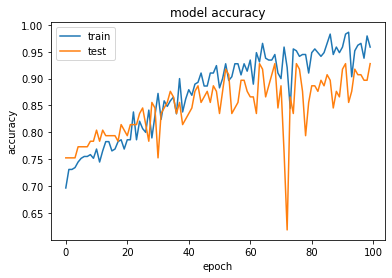

In [47]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

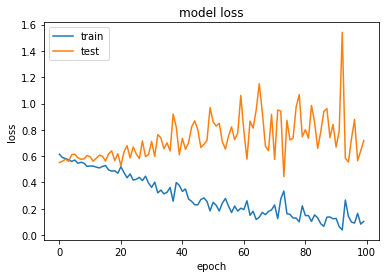

In [48]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()